In [414]:
#importing neccessary labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')

In [415]:
#importing data into dataframe
data = pd.read_csv('population_diabetes.csv')

In [416]:
#Looking data features and values
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [417]:
#Total rows and column with total number of values in DataSet
print(data.shape)
print(data.size)

(768, 9)
6912


In [418]:
#Basic Statistics overview
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [419]:
#Looking into data type as there is no need to make any datatype change things
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [420]:
#Replacing the 0 with NaN
data = data.replace(0, np.nan)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [421]:
data = data.fillna(data.mode())
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


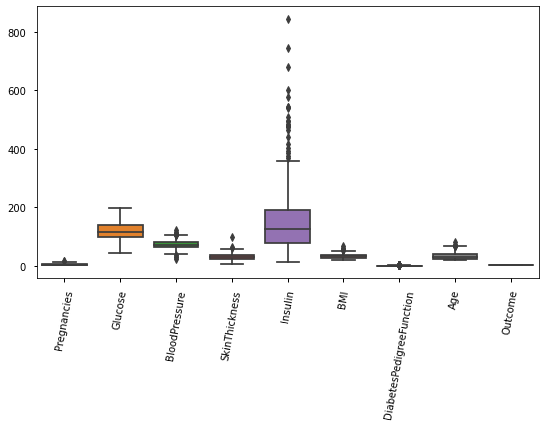

In [422]:
plt.figure(figsize=(9, 5))
Identify_outliers = sns.boxplot(data=data)
for tick in Identify_outliers.get_xticklabels():
    tick.set_rotation(80)
    fig.align_labels()

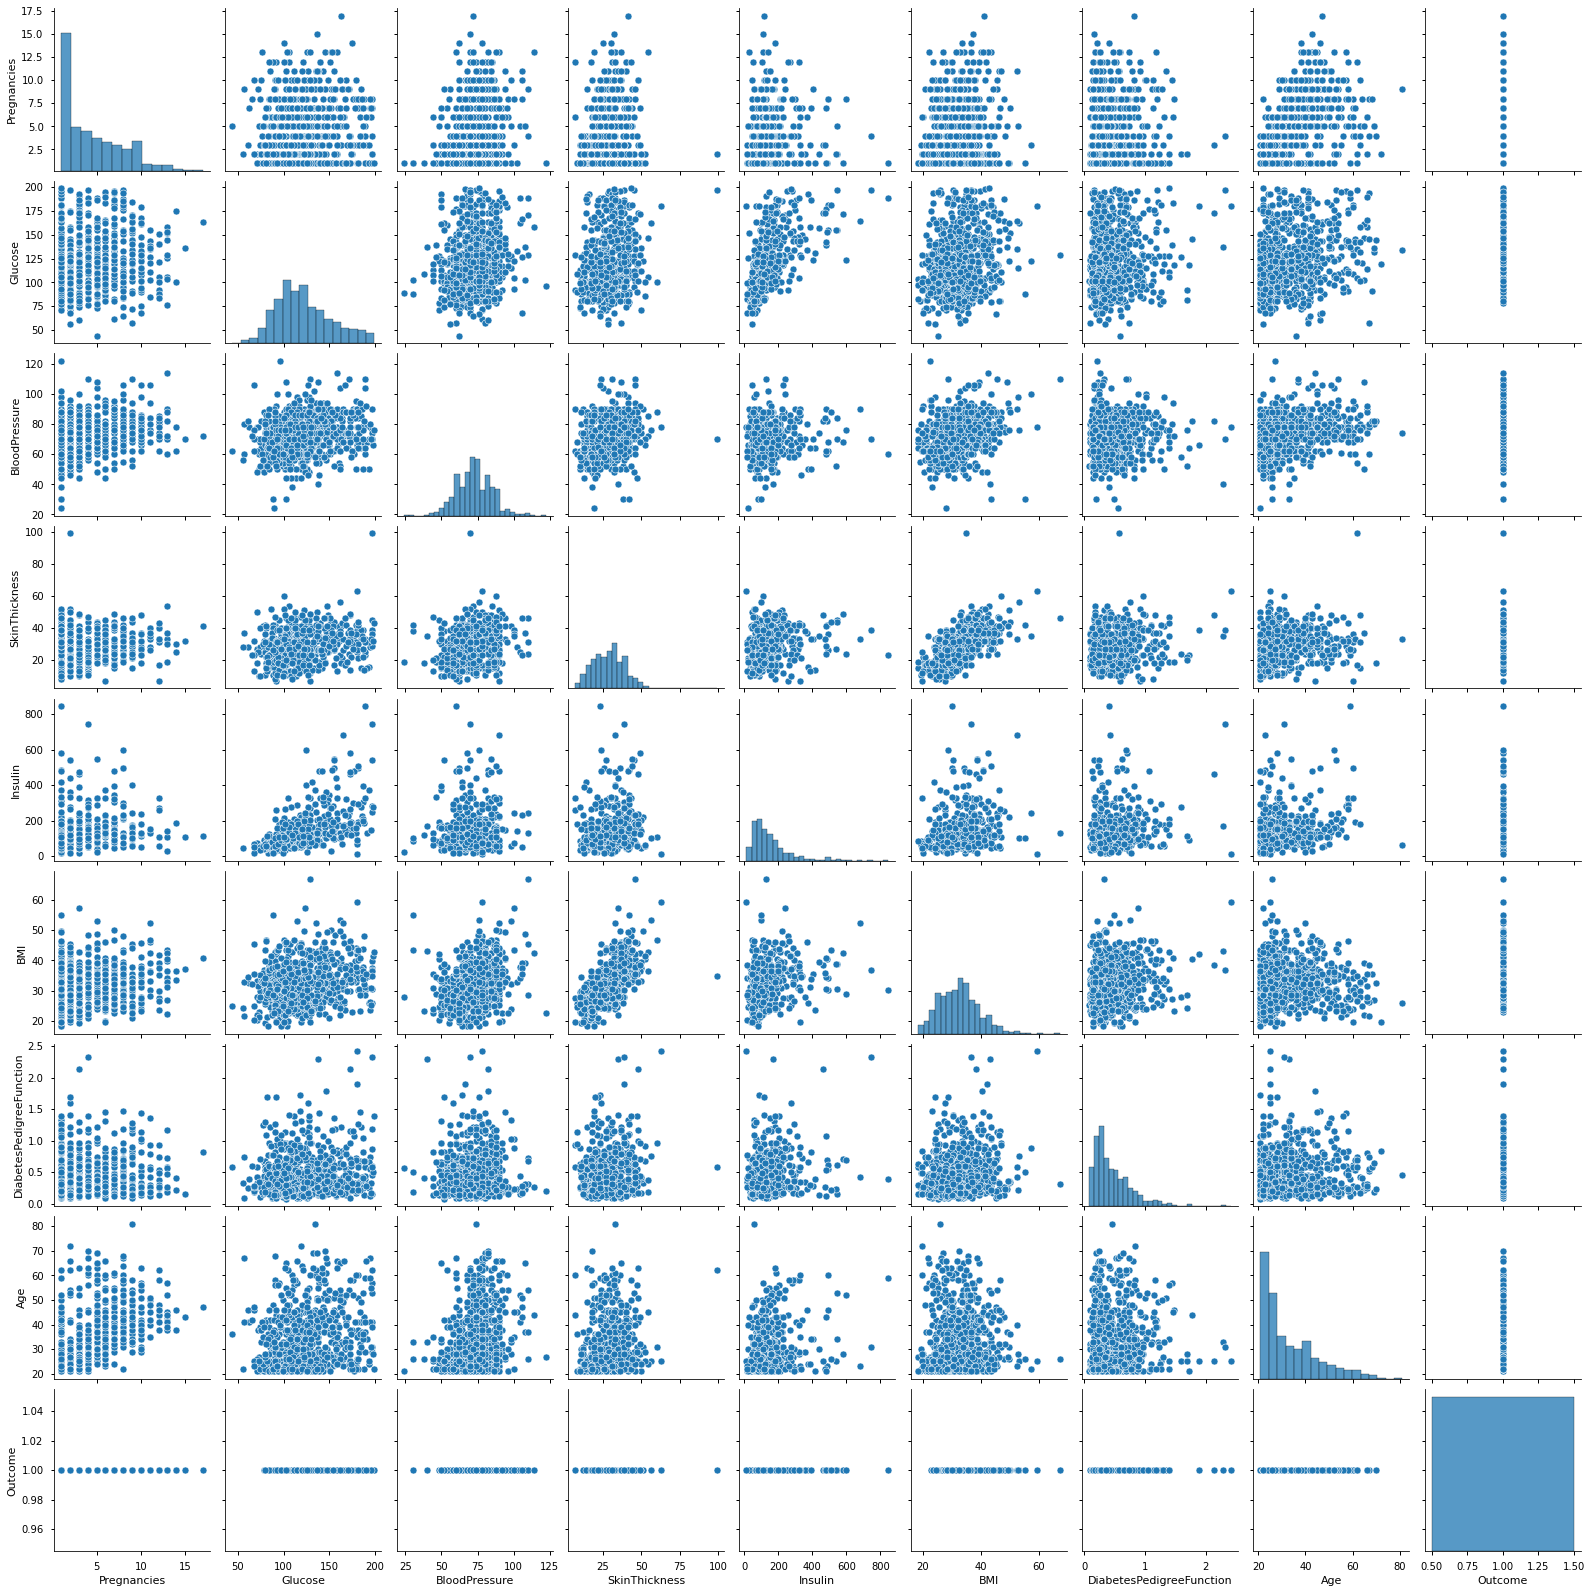

In [371]:
#Ploting the pairplot the see the distribution of ll features
sns.pairplot(data)

In [426]:
#looking the IQE percentage of all features
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      42.0000
BloodPressure                16.0000
SkinThickness                14.0000
Insulin                     113.5000
BMI                           9.1000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       0.0000
dtype: float64


In [427]:
#Individual feature statistics
print(data['Pregnancies'].skew())
data['Pregnancies'].describe()

0.8855351681761828


count    657.000000
mean       4.494673
std        3.217291
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [428]:
print(data['Glucose'].skew())
data['Glucose'].describe()

0.5309885349396285


count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [429]:
print(data['BloodPressure'].skew())
data['BloodPressure'].describe()

0.13415273171959252


count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [430]:
print(data['SkinThickness'].skew())
data['SkinThickness'].describe()

0.690619013984192


count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [431]:
print(data['Insulin'].skew())
data['Insulin'].describe()

2.1707503457021824


count    395.000000
mean     155.420253
std      118.652291
min       14.000000
25%       76.500000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [436]:
print(data['BMI'].skew())
data['BMI'].describe()

0.5939697505712673


count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [438]:
print(data['DiabetesPedigreeFunction'].skew())
data['DiabetesPedigreeFunction'].describe()      

1.919911066307204


count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [439]:
print(data['Age'].skew())
data['Age'].describe()

1.1295967011444805


count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [440]:
print(data['Outcome'].skew())
data['Outcome'].describe()

0


count    268.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Outcome, dtype: float64

In [441]:
print(data['Insulin'].skew())
data['Insulin'].describe()

2.1707503457021824


count    395.000000
mean     155.420253
std      118.652291
min       14.000000
25%       76.500000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [443]:
#Remove outliers from the dataset seems some feature having outliers.
def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.03,0.97]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data


In [384]:
cap_data(data)

capping the  Pregnancies
capping the  Glucose
capping the  BloodPressure
capping the  SkinThickness
capping the  Insulin
capping the  BMI
capping the  DiabetesPedigreeFunction
capping the  Age
capping the  Outcome


C:\Users\abhij\AppData\Local\Temp/ipykernel_16720/2137852303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\abhij\AppData\Local\Temp/ipykernel_16720/2137852303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,105.0,33.6,0.62700,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.35100,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.67200,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21,NaN
4,NaN,137.0,50.0,35.0,168.0,43.1,1.25793,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.17100,62,NaN
764,2.0,122.0,70.0,27.0,NaN,36.8,0.34000,27,NaN
765,5.0,121.0,72.0,23.0,112.0,26.2,0.24500,30,NaN
766,1.0,126.0,60.0,NaN,NaN,30.1,0.34900,47,1.0


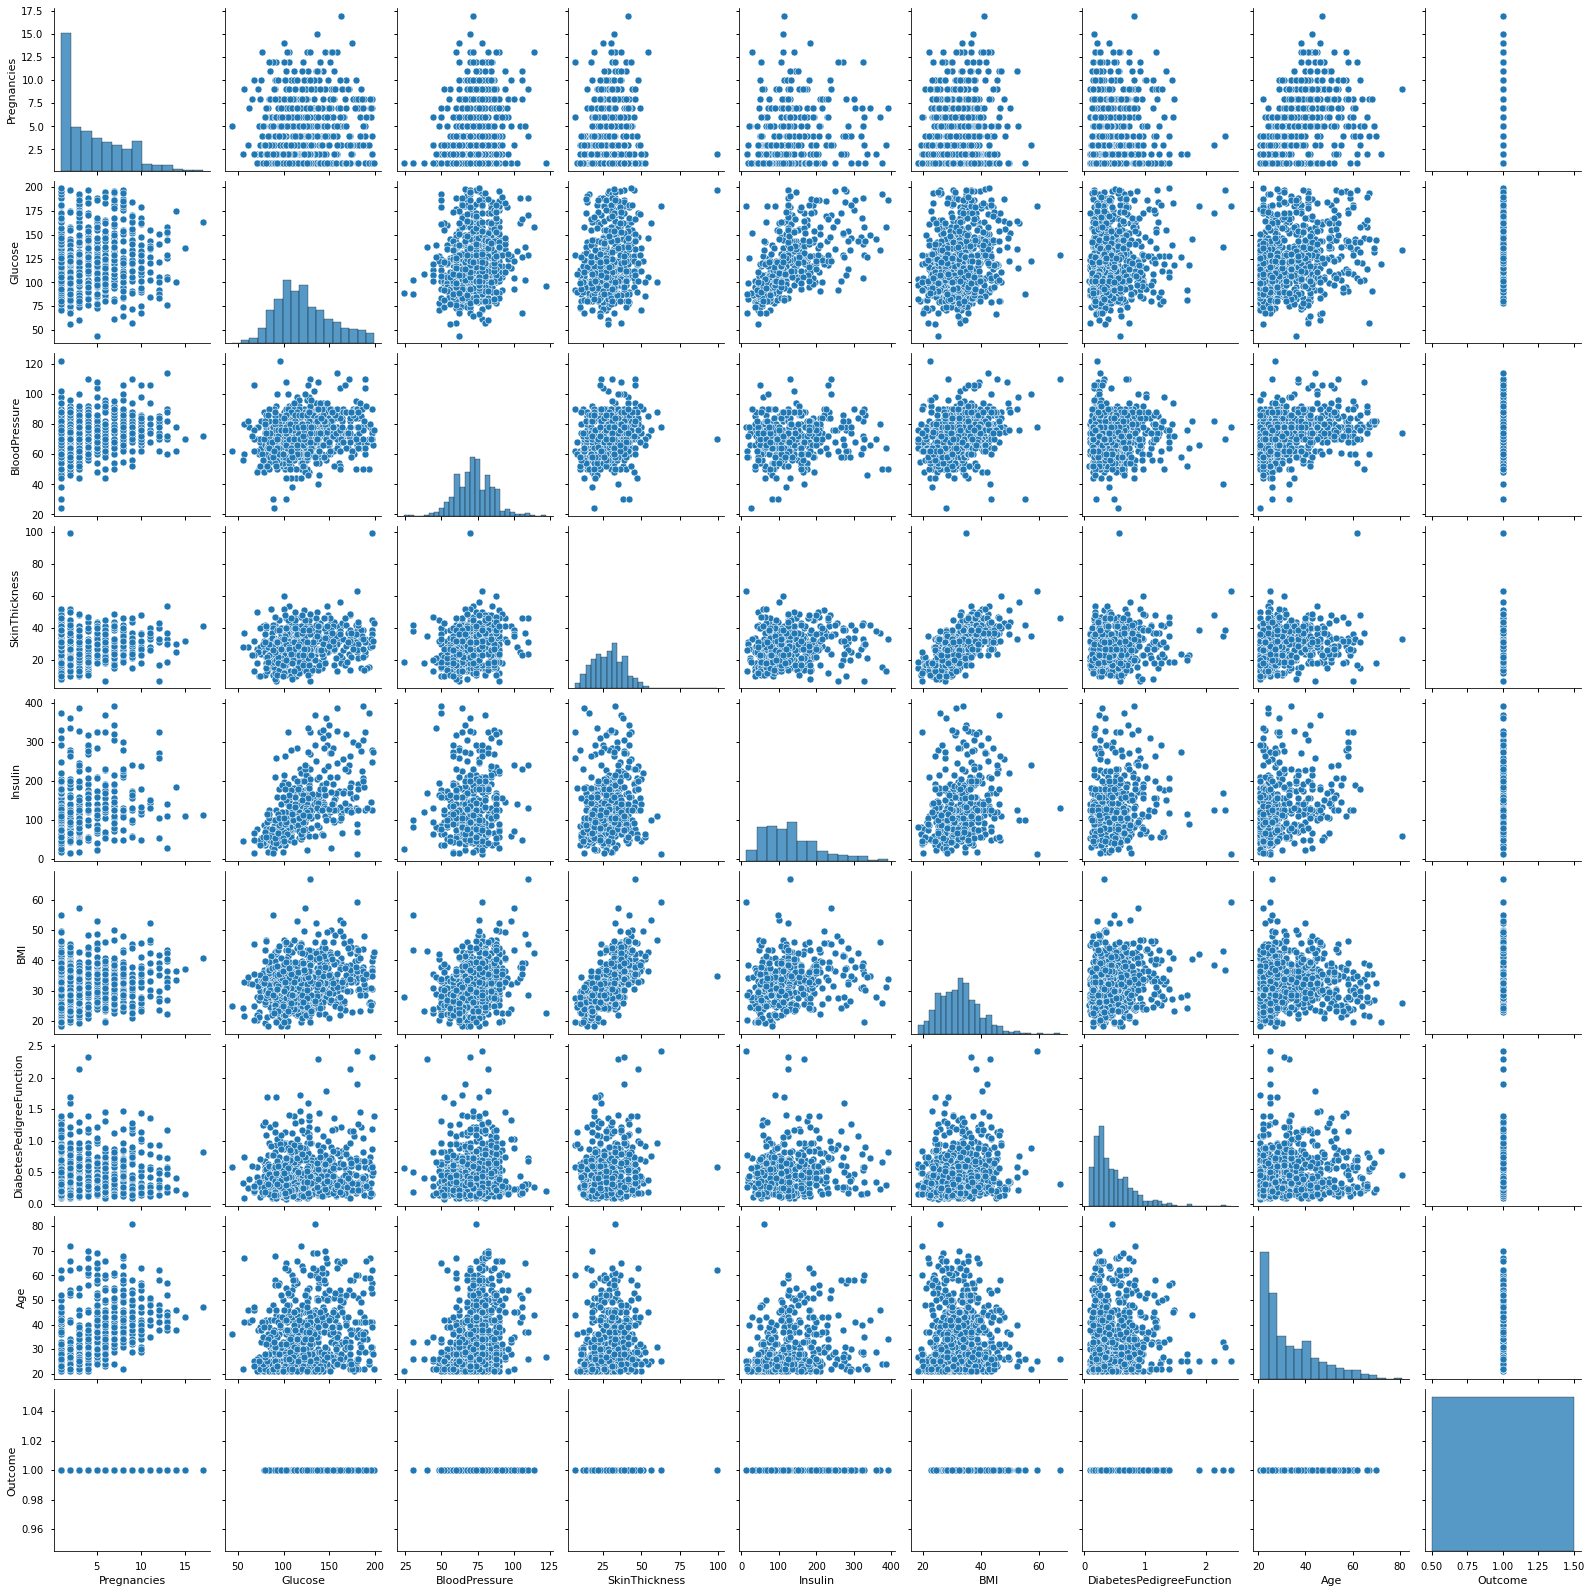

In [445]:
#distribution to see the effect of outlier remove
sns.pairplot(data)

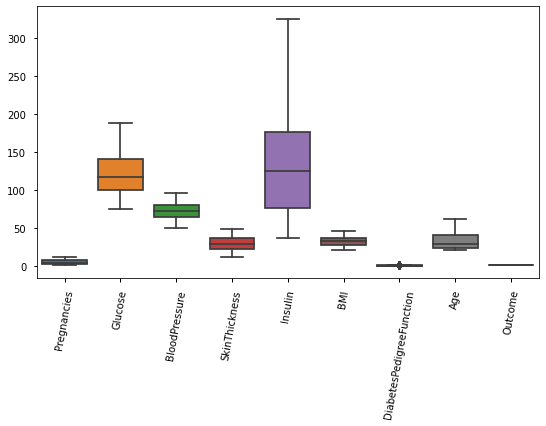

In [386]:
#Outlier remove shownm with box plot
plt.figure(figsize=(9, 5))
Clear_outlier = sns.boxplot(data=data)
for tick in Clear_outlier.get_xticklabels():
    tick.set_rotation(80)
    fig.align_labels() 

In [387]:
#Implimenting correlation
corrM = data.corr()

<AxesSubplot:>

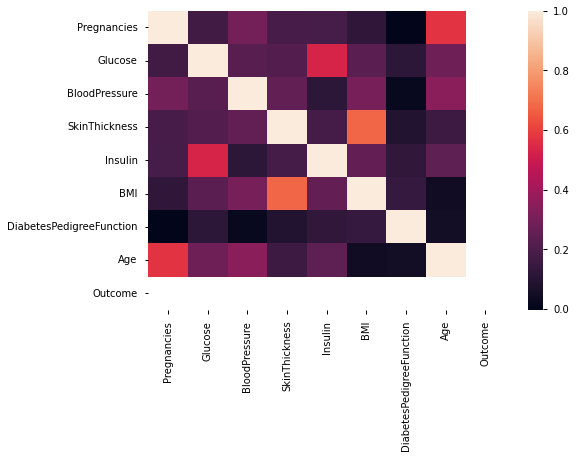

In [388]:
sns.heatmap(corrM)

# Performing Z_test and T_test

In [404]:
from statsmodels.stats import weightstats as stests
import scipy.stats as stats
dataframe = pd.read_excel(r"sample.xlsx")
dataframe[['BloodPressure','DiabetesPedigreeFunction']].describe()

,BloodPressure,DiabetesPedigreeFunction
count,42.000000,42.000000
mean,69.880952,0.502357
std,20.848118,0.408390
min,0.000000,0.134000
25%,66.000000,0.249500
50%,74.000000,0.409000
75%,81.500000,0.578000
max,96.000000,2.288000


In [446]:
ztest ,propability_value = stests.ztest(dataframe['DiabetesPedigreeFunction'], x2=None, value=0.50)
print(float(propability_value))

if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis accepted")
else:
    print("Null hyphothesis accepted , Alternative hyphothesis rejected")

1.5846032989076383e-110
Null hyphothesis rejected , Alternative hyphothesis accepted


In [450]:
t_statistic, p_value = stats.ttest_1samp(a=data['DiabetesPedigreeFunction'], popmean=0.502357)
print(t_statistic , p_value)

-2.5494505810361545 0.010982800278971656
